## Grab glider data from IOOS DAC using ERDDAPY


This tutorial shows you how to navigate the [IOOS glider DAC](https://gliders.ioos.us/erddap/index.html) webpage and download data using ERDDAPY in a csv format.

More advanced tutorials can be found on the [IOOS CodeLab](https://ioos.github.io/ioos_code_lab/content/intro.html) and the [ERDDAPY](https://ioos.github.io/erddapy/01b-tabledap-output.html) Github pages.

Navigate to https://gliders.ioos.us/erddap/index.html and then to the "tabledap datasets" page to view all glider deployments.



![ERDDAP_HOMEPAGE](assets/erddap_homepage.png)


![TABLEDAP](assets/tabledap.png)

By selecting the "data" tab, you can see all the available variables for a glider deployment. 

Additionally, by clicking the "?", the metadata for that variable will be shown or if you scroll to the bottom of the page, the data attribute section lists the metadata for all variables available.


![VARIABLES](assets/data.png)

## ERDDAPY

The rest of this tutorial will show an example of using ERDDAPY to pull the following variables for deployment "ru38-20240128T1523", which is a real-time dataset. 

For some institutions, there may be delayed-mode datasets (i.e. full data resolution for the duration of the deployment) indicated by "-delayed" in the dataset id.

* time - Timestamp corresponding to the mid-point of the profile
* prectise_time - Timestamp at each point in the timeseries
* depth - Height where Z is positive downward
* temperature - Sea water temperature measured from the CTD (Celcius)
* salinity - Sea water practical salinity derived from the CTD
* density - Sea water density derived from the CTD
* latitude - Interpolated value at mid-point of the profile
* longitude - Interpolated value at mid-point of the profile
* precise_lat - Interpolated value at each point in the timeseries
* precise_lon - Interpolated value at each point in the timeseries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from erddapy import ERDDAP
import cmocean
import cool_maps.plot as cplt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

Lets use ERDDAPY to get information on the variables of interest. Using the get_info_url function, we can grab the metadata on temperature, salinity, and density.

In [2]:
e = ERDDAP(server="https://gliders.ioos.us/erddap")
ds_id = "ru38-20240128T1523"
vars=pd.read_csv(e.get_info_url(dataset_id=ds_id, response='csv'))

In [3]:
# list avaiable variables

vars['Variable Name'].unique()

array(['NC_GLOBAL', 'trajectory', 'wmo_id', 'profile_id', 'time',
       'latitude', 'longitude', 'depth', 'ad2cp_bottom_track_signal',
       'ad2cp_file_state', 'ad2cp_run_state', 'ad2cp_surface_state',
       'commanded_alt_time', 'commanded_climb_target_depth',
       'commanded_de_oil_vol', 'commanded_dive_target_depth',
       'commanded_fin', 'commanded_heading', 'commanded_science_send_all',
       'commanded_thruster_on', 'commanded_weight_drop',
       'commanded_wpt_lat', 'commanded_wpt_lon', 'commanded_wpt_x_lmc',
       'commanded_wpt_y_lmc', 'conductivity', 'crs', 'ctd41cp_timestamp',
       'density', 'dr_latitude', 'dr_longitude', 'f_fin_offset',
       'f_ocean_pressure_max', 'f_ocean_pressure_min', 'gps_latitude',
       'gps_longitude', 'instrument_adcp', 'instrument_ctd', 'lat_uv',
       'lon_uv', 'measured_altimeter_status',
       'measured_altimeter_voltage', 'measured_avg_speed',
       'measured_battery_inst', 'measured_battpos',
       'measured_bms_aft_curre

When listing out the metadata, be sure to check the observation_type if it says measured or calculated. If the variable is calculated you may want to calculate it yourself using your algorithm of choice. 

This is especially important with density data because there is not a standard for whether in-situ or potential density is used.

In [4]:
vars[vars['Variable Name']=='temperature']

,Row Type,Variable Name,Attribute Name,Data Type,Value
1960,variable,temperature,NaN,float,NaN
1961,attribute,temperature,_ChunkSizes,uint,773
1962,attribute,temperature,_FillValue,float,9.96921E36
1963,attribute,temperature,actual_range,float,"0.0, 28.4076"
1964,attribute,temperature,ancillary_variables,String,instrument_ctd qartod_temperature_flat_line_fl...
1965,attribute,temperature,bytes,int,4
1966,attribute,temperature,colorBarMaximum,double,32.0
1967,attribute,temperature,colorBarMinimum,double,0.0
1968,attribute,temperature,comment,String,Native glider sensor name
1969,attribute,temperature,instrument,String,instrument_ctd


In [5]:
vars[vars['Variable Name']=='salinity']

,Row Type,Variable Name,Attribute Name,Data Type,Value
1875,variable,salinity,NaN,float,NaN
1876,attribute,salinity,_ChunkSizes,uint,773
1877,attribute,salinity,_FillValue,float,9.96921E36
1878,attribute,salinity,actual_range,float,"0.0, 37.0843"
1879,attribute,salinity,ancillary_variables,String,instrument_ctd
1880,attribute,salinity,colorBarMaximum,double,37.0
1881,attribute,salinity,colorBarMinimum,double,30.0
1882,attribute,salinity,instrument,String,instrument_ctd
1883,attribute,salinity,ioos_category,String,Salinity
1884,attribute,salinity,long_name,String,Sea Water Practical Salinity


In [6]:
vars[vars['Variable Name']=='density']

,Row Type,Variable Name,Attribute Name,Data Type,Value
479,variable,density,NaN,float,NaN
480,attribute,density,_ChunkSizes,uint,773
481,attribute,density,_FillValue,float,9.96921E36
482,attribute,density,actual_range,float,"999.8445, 1032.13"
483,attribute,density,ancillary_variables,String,instrument_ctd
484,attribute,density,colorBarMaximum,double,1032.0
485,attribute,density,colorBarMinimum,double,1020.0
486,attribute,density,instrument,String,instrument_ctd
487,attribute,density,ioos_category,String,Other
488,attribute,density,long_name,String,Sea Water Density


Using a custom function we can pull the RU38 deployment and the variables of our choice. It can be retrieved as a netcdf of dataframe. Here we will retrieve the data as a dataframe.

In [7]:
def get_erddap_dataset(ds_id, server, variables=None, constraints=None, filetype=None):
    ## Written by Mike Smith
    """
    Returns a netcdf dataset for a specified dataset ID (or dataframe if dataset cannot be converted to xarray)
    :param ds_id: dataset ID e.g. ng314-20200806T2040
    :param variables: optional list of variables
    :param constraints: optional list of constraints
    :param filetype: optional filetype to return, 'nc' (default) or 'dataframe'
    :return: netcdf dataset
    """
    variables = variables or None
    constraints = constraints or None
    filetype = filetype or 'nc'
    


    e = ERDDAP(server,
               protocol='tabledap',
               response='nc')
    e.dataset_id = ds_id
    if constraints:
        e.constraints = constraints
    if variables:
        e.variables = variables
    if filetype == 'nc':
        try:
            ds = e.to_xarray()
            ds = ds.sortby(ds.time)
        except OSError:
            print('No dataset available for specified constraints: {}'.format(ds_id))
            ds = []
        except TypeError:
            print('Cannot convert to xarray, providing dataframe: {}'.format(ds_id))
            ds = e.to_pandas().dropna()
    elif filetype == 'dataframe':
        #ds = e.to_pandas().dropna()
        ds = e.to_pandas().dropna(how='all')
    else:
        print('Unrecognized filetype: {}. Needs to  be "nc" or "dataframe"'.format(filetype))

    return ds

In [8]:
ds_id = "ru38-20240128T1523"
#variables don't have to be in any particular order
variables = ['depth', 'latitude', 'longitude','precise_lat','precise_lon', 'time', 'precise_time','temperature', 'salinity','density']
df = get_erddap_dataset(ds_id, server='https://gliders.ioos.us/erddap', variables =variables, filetype='dataframe')

In [9]:
df

,depth (m),latitude (degrees_north),longitude (degrees_east),precise_lat (degree_north),precise_lon (degree_east),time (UTC),precise_time (UTC),temperature (degrees_C),salinity (1),density (kg m-3)
0,6.152503,18.898426,-87.269397,18.898524,-87.269401,2024-01-28T15:29:15Z,2024-01-28T15:27:34Z,27.7943,35.543800,1022.89800
1,8.180105,18.898426,-87.269397,18.898511,-87.269401,2024-01-28T15:29:15Z,2024-01-28T15:27:47Z,27.7922,35.550774,1022.91270
2,10.297139,18.898426,-87.269397,18.898499,-87.269400,2024-01-28T15:29:15Z,2024-01-28T15:28:00Z,27.7917,35.557354,1022.92694
3,NaN,18.898426,-87.269397,18.898497,-87.269400,2024-01-28T15:29:15Z,2024-01-28T15:28:02Z,NaN,NaN,NaN
4,12.722259,18.898426,-87.269397,18.898486,-87.269400,2024-01-28T15:29:15Z,2024-01-28T15:28:13Z,27.7921,35.567253,1022.94470
...,...,...,...,...,...,...,...,...,...,...
755536,NaN,18.898676,-87.275179,18.898713,-87.275220,2024-04-04T15:18:01Z,2024-04-04T15:21:08Z,NaN,NaN,NaN
755537,NaN,18.898676,-87.275179,18.898713,-87.275220,2024-04-04T15:18:01Z,2024-04-04T15:21:12Z,NaN,NaN,NaN
755538,NaN,18.898676,-87.275179,18.898713,-87.275220,2024-04-04T15:18:01Z,2024-04-04T15:21:20Z,NaN,NaN,NaN
755539,NaN,18.898676,-87.275179,18.898713,-87.275220,2024-04-04T15:18:01Z,2024-04-04T15:21:28Z,NaN,NaN,NaN


In [10]:
#rename columns so they're easier to work with
df.columns = variables
df

,depth,latitude,longitude,precise_lat,precise_lon,time,precise_time,temperature,salinity,density
0,6.152503,18.898426,-87.269397,18.898524,-87.269401,2024-01-28T15:29:15Z,2024-01-28T15:27:34Z,27.7943,35.543800,1022.89800
1,8.180105,18.898426,-87.269397,18.898511,-87.269401,2024-01-28T15:29:15Z,2024-01-28T15:27:47Z,27.7922,35.550774,1022.91270
2,10.297139,18.898426,-87.269397,18.898499,-87.269400,2024-01-28T15:29:15Z,2024-01-28T15:28:00Z,27.7917,35.557354,1022.92694
3,NaN,18.898426,-87.269397,18.898497,-87.269400,2024-01-28T15:29:15Z,2024-01-28T15:28:02Z,NaN,NaN,NaN
4,12.722259,18.898426,-87.269397,18.898486,-87.269400,2024-01-28T15:29:15Z,2024-01-28T15:28:13Z,27.7921,35.567253,1022.94470
...,...,...,...,...,...,...,...,...,...,...
755536,NaN,18.898676,-87.275179,18.898713,-87.275220,2024-04-04T15:18:01Z,2024-04-04T15:21:08Z,NaN,NaN,NaN
755537,NaN,18.898676,-87.275179,18.898713,-87.275220,2024-04-04T15:18:01Z,2024-04-04T15:21:12Z,NaN,NaN,NaN
755538,NaN,18.898676,-87.275179,18.898713,-87.275220,2024-04-04T15:18:01Z,2024-04-04T15:21:20Z,NaN,NaN,NaN
755539,NaN,18.898676,-87.275179,18.898713,-87.275220,2024-04-04T15:18:01Z,2024-04-04T15:21:28Z,NaN,NaN,NaN


We will subset the dataframe and plot a timeseries of temperature as a function of depth and time

In [11]:

#convert time and precise_time to datatimes
df['time'] = pd.to_datetime(df.time)
df['precise_time'] = pd.to_datetime(df.precise_time)

#set time as the index
df=df.set_index('time')

#subset to a few days. Both end members ARE inclusive
sub_df=df['2024-01-28':'2024-01-30']

Plotting both time and precise time, you can see that the profiles are straight up and down when "time" is used and in the sawtooth pattern when "precise_time" is used.

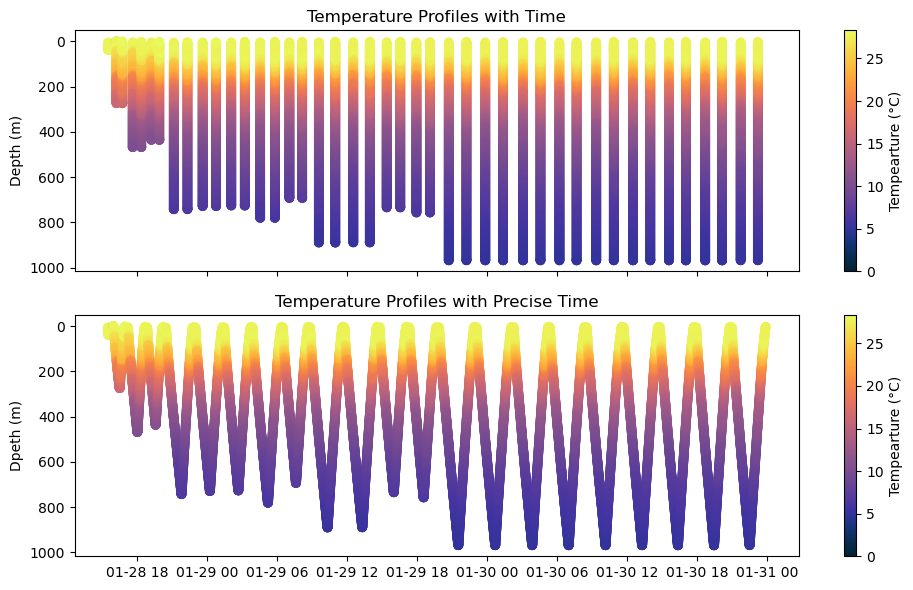

In [12]:
fig,ax=plt.subplots(2,1,figsize=(10,6),sharex=True)

cb1=ax[0].scatter(sub_df.index,sub_df.depth,c=sub_df.temperature,cmap=cmocean.cm.thermal)
ax[0].set_title('Temperature Profiles with Time')
ax[0].invert_yaxis()
ax[0].set_ylabel('Depth (m)')
plt.colorbar(cb1,ax=ax[0],label='Tempearture (°C)')


cb2=ax[1].scatter(sub_df.precise_time,sub_df.depth,c=sub_df.temperature,cmap=cmocean.cm.thermal)
ax[1].invert_yaxis()
ax[1].set_title('Temperature Profiles with Precise Time')
ax[1].set_ylabel('Dpeth (m)')
plt.colorbar(cb2,ax=ax[1],label='Tempearture (°C)')
plt.tight_layout()

Gliders move in a sawtooth like pattern throughout the water column collecting profiles on the up and down cast as you can see in the precise_time plot above. 

Next we will pull out individual temperature profile. 

To do this we can use the "time", which we set as our index, because it is unique to each up and down cast.

In [13]:
prof_list = sub_df.index.unique()
print('There are ', len(prof_list), ' unique profiles')

There are  44  unique profiles


In [14]:
#lets pull the last profile in the subset
prof_id = prof_list[-1]
#subset dataframe to the last profile
pdf=sub_df[sub_df.index == prof_id]
pdf

,depth,latitude,longitude,precise_lat,precise_lon,precise_time,temperature,salinity,density
time,,,,,,,,,
2024-01-30 23:12:36+00:00,967.812200,19.14716,-87.079051,19.145811,-87.086564,2024-01-30 22:30:18+00:00,5.1036,34.920887,1032.07630
2024-01-30 23:12:36+00:00,NaN,19.14716,-87.079051,19.145813,-87.086556,2024-01-30 22:30:21+00:00,NaN,NaN,NaN
2024-01-30 23:12:36+00:00,967.535200,19.14716,-87.079051,19.145818,-87.086525,2024-01-30 22:30:31+00:00,5.1039,34.921974,1032.07590
2024-01-30 23:12:36+00:00,NaN,19.14716,-87.079051,19.145819,-87.086520,2024-01-30 22:30:33+00:00,NaN,NaN,NaN
2024-01-30 23:12:36+00:00,NaN,19.14716,-87.079051,19.145823,-87.086496,2024-01-30 22:30:41+00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-01-30 23:12:36+00:00,NaN,19.14716,-87.079051,19.148528,-87.071808,2024-01-30 23:54:28+00:00,NaN,NaN,NaN
2024-01-30 23:12:36+00:00,NaN,19.14716,-87.079051,19.148528,-87.071808,2024-01-30 23:54:36+00:00,NaN,NaN,NaN
2024-01-30 23:12:36+00:00,NaN,19.14716,-87.079051,19.148528,-87.071808,2024-01-30 23:54:40+00:00,NaN,NaN,NaN


Text(0.5, 0, 'Temperature (°C)')

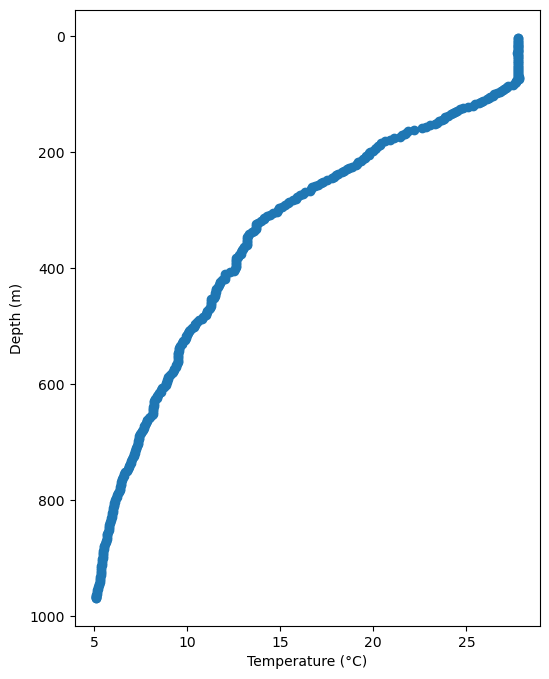

In [15]:
fig=plt.figure(figsize=(6,8))
plt.scatter(pdf.temperature,pdf.depth)
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Temperature (°C)')

Lastly, we will  make a couple of maps using latitude, longitude, precise_lat, and precise_lon. 

There will be more data points using the precise variables because they are at each point in the timeseries whereas latitude and longitude are at the mid-points of each profile.

We can create the map using the [cool_maps](https://github.com/rucool/cool_maps/) package.

Text(0, 0.5, 'Precise Latitude')

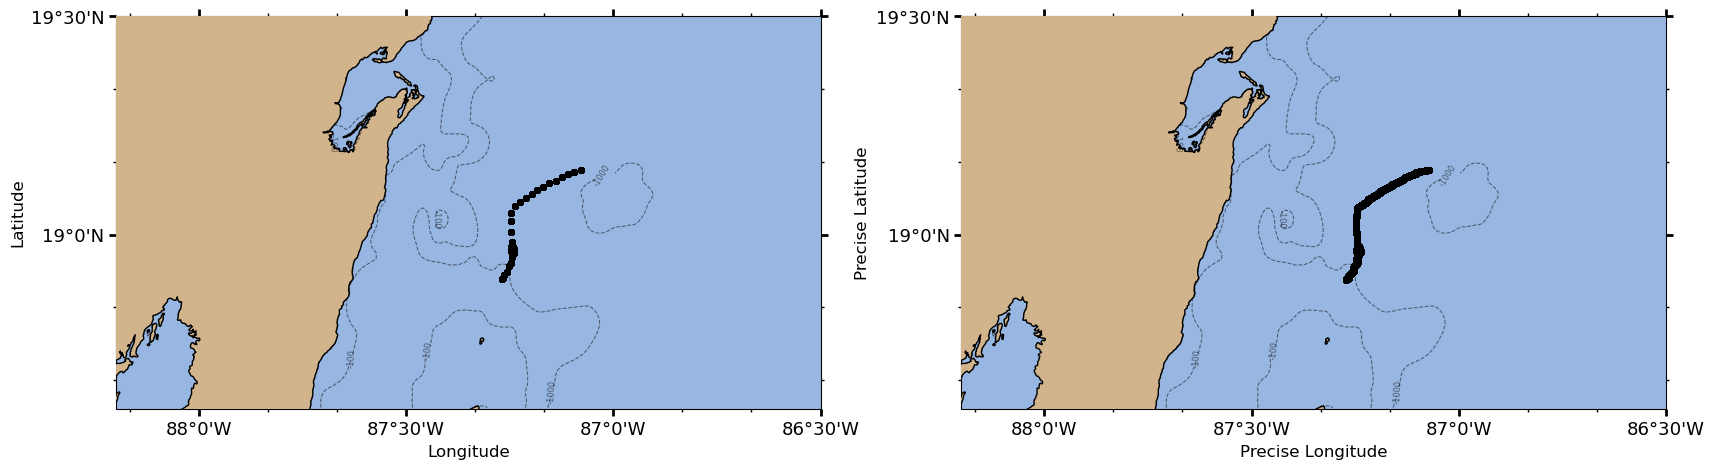

In [16]:

extent=[-88.2,-86.5,18.6,19.5]

fig,ax= plt.subplots(1,2,figsize=(20,20), subplot_kw={'projection': ccrs.Mercator()},sharey=True)

#use cool maps to create cartopy map
cplt.create(extent,ax=ax[0], proj=ccrs.Mercator(),gridlines=False, bathymetry=True)
ax[0].scatter(sub_df.longitude,sub_df.latitude,c='black',s=15,transform=ccrs.PlateCarree())
ax[0].set_xlabel('Longitude',fontsize=12)
ax[0].set_ylabel('Latitude',fontsize=12)

cplt.create(extent,ax=ax[1], proj=ccrs.Mercator(),gridlines=False, bathymetry=True)
cb=ax[1].scatter(sub_df.precise_lon,sub_df.precise_lat,c='black',s=15,transform=ccrs.PlateCarree())
ax[1].set_xlabel('Precise Longitude',fontsize=12)
ax[1].set_ylabel('Precise Latitude',fontsize=12)

